In [60]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [61]:
rf = pd.read_csv("results/grn_rf_results.csv", header=0)
rf_adb = pd.read_csv("results/grn_rf_ada_results.csv", header=0)
rf_gb = pd.read_csv("results/grn_rf_gb_results.csv", header=0)

In [62]:
new_rows = []
for index, row in rf_adb.iterrows():
    new_row = row.copy()
    new_row['FI'] = 'SHAP'
    new_row['AUPRC'] = None
    new_row['AUROC'] = None
    new_row['MEAN_AUROC'] = None
    new_row['p-value'] = None
    new_rows.append(row)
    new_rows.append(new_row)

rf_adb_new = pd.DataFrame(new_rows, columns=rf_adb.columns)

In [63]:
df_list = [rf, rf_adb_new, rf_gb]
results_all = pd.concat(df_list)

In [64]:
results_all.rename(columns={"MAX_FEATURES": "Feature Bagging"}, inplace=True)

results_all["Index"] =''
results_all.loc[(results_all["Feature Bagging"] == '100') & (results_all["BOOSTING"] == "No") & (results_all["BOOTSTRAPPING"] == False) , "Index"] = "Vanilla" 
results_all.loc[(results_all["Feature Bagging"] == '100') & (results_all["BOOSTING"] == "No") & (results_all["BOOTSTRAPPING"] == True) , "Index"] = "Bootstrapping" 
results_all.loc[(results_all["Feature Bagging"] == 'sqrt') & (results_all["BOOSTING"] == "No") & (results_all["BOOTSTRAPPING"] == False) , "Index"] = "Feature Bagging" 
results_all.loc[(results_all["Feature Bagging"] == 'sqrt') & (results_all["BOOSTING"] == "No") & (results_all["BOOTSTRAPPING"] == True) , "Index"] = "Feature Bagging \n& Bootstrapping" 
results_all.loc[(results_all["Feature Bagging"] == '100') & (results_all["BOOSTING"] == "Adaboostexponential") & (results_all["BOOTSTRAPPING"] == False) , "Index"] = "Adaboost" 
results_all.loc[(results_all["Feature Bagging"] == 'sqrt') & (results_all["BOOSTING"] == "Adaboostexponential") & (results_all["BOOTSTRAPPING"] == False) , "Index"] = "Adaboost \n& Feature Bagging" 
results_all.loc[(results_all["Feature Bagging"] == '100') & (results_all["BOOSTING"] == "GradientBoostingsquared_error") & (results_all["BOOTSTRAPPING"] == False) , "Index"] = "Gradient Boosting" 
results_all.loc[(results_all["Feature Bagging"] == 'sqrt') & (results_all["BOOSTING"] == "GradientBoostingsquared_error") & (results_all["BOOTSTRAPPING"] == False) , "Index"] = "Gradient Boosting \n& Feature Bagging" 


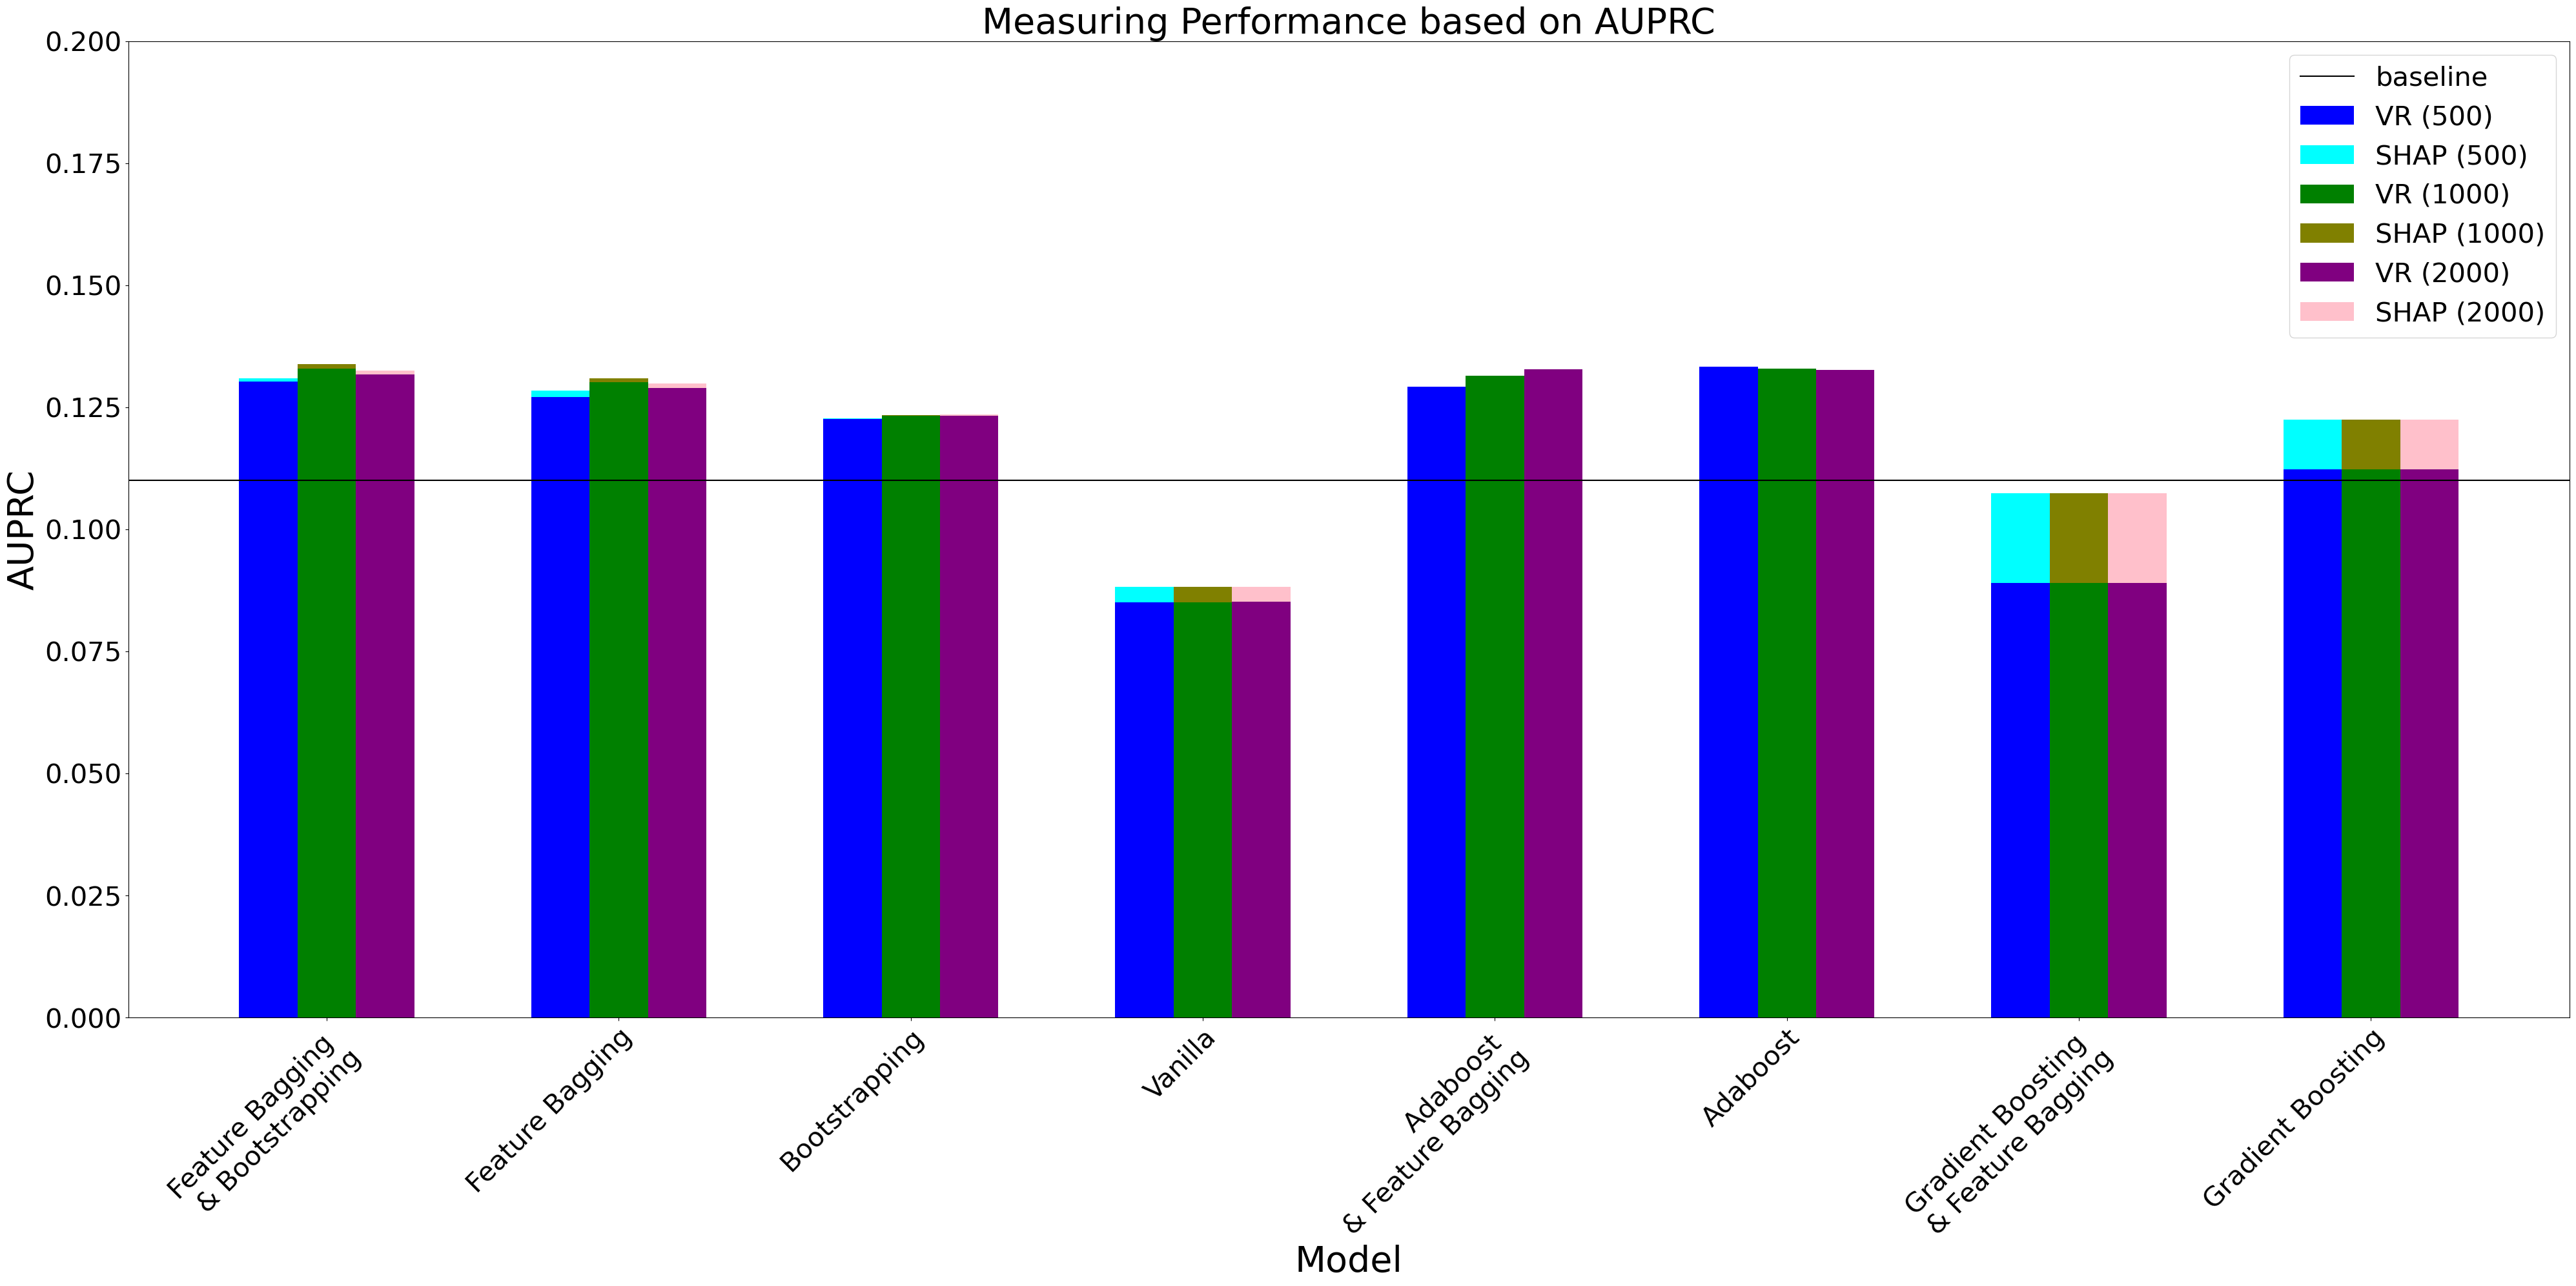

In [90]:
mr=5

plt. figure(figsize=(40, 20))

results=results_all[results_all["MR"] == mr]

index = results.loc[(results["N_EST"]==500) & (results["FI"]=='VR'), "Index"]
vr = results.loc[(results["N_EST"]==500) & (results["FI"]=='VR'), "AUPRC"]
shap = results.loc[(results["N_EST"]==500) & (results["FI"]=='SHAP'), "AUPRC"]

bar_width = 0.2
bar_positions_1 = range(len(index))
plt.bar(x=bar_positions_1,height=vr,color="blue",align='edge', width=bar_width)
plt.bar(x=bar_positions_1,height=[i - j for i, j in zip(shap, vr)],color="cyan",align='edge', bottom = vr, width=bar_width)

vr = results.loc[(results["N_EST"]==1000) & (results["FI"]=='VR'), "AUPRC"]
shap = results.loc[(results["N_EST"]==1000) & (results["FI"]=='SHAP'), "AUPRC"]

bar_positions_2 = [pos + bar_width for pos in bar_positions_1]
plt.bar(x=bar_positions_2,height=vr,color="green",align='edge', width=bar_width)
plt.bar(x=bar_positions_2,height=[i - j for i, j in zip(shap, vr)],color="olive",align='edge', bottom = vr, width=bar_width)

vr = results.loc[(results["N_EST"]==2000) & (results["FI"]=='VR'), "AUPRC"]
shap = results.loc[(results["N_EST"]==2000) & (results["FI"]=='SHAP'), "AUPRC"]

bar_positions_3 = [pos + bar_width for pos in bar_positions_2]
plt.bar(x=bar_positions_3,height=vr,color="purple",align='edge', width=bar_width)
plt.bar(x=bar_positions_3,height=[i - j for i, j in zip(shap, vr)],color="pink",align='edge', bottom = vr, width=bar_width)

tickvalues = np.array(bar_positions_2) + bar_width/2

plt.ylim(0,0.2)
plt.axhline(y = 0.10999212039806713, color = 'black', linestyle = '-') 

plt.xticks(ticks = tickvalues,labels = index, rotation=45, ha='right', size = 30, wrap=True)
plt.yticks(size = 30)

plt.title("Measuring Performance based on AUPRC",  size = 40)
plt.xlabel("Model",  size = 40)
plt.ylabel("AUPRC",  size = 40)

plt.legend(["baseline" , "VR (500)", "SHAP (500)", "VR (1000)", "SHAP (1000)", "VR (2000)", "SHAP (2000)"], fontsize=30, loc='upper right')

plt.tight_layout()
plt.savefig("results/AUPRC_{}MR.png".format(mr))

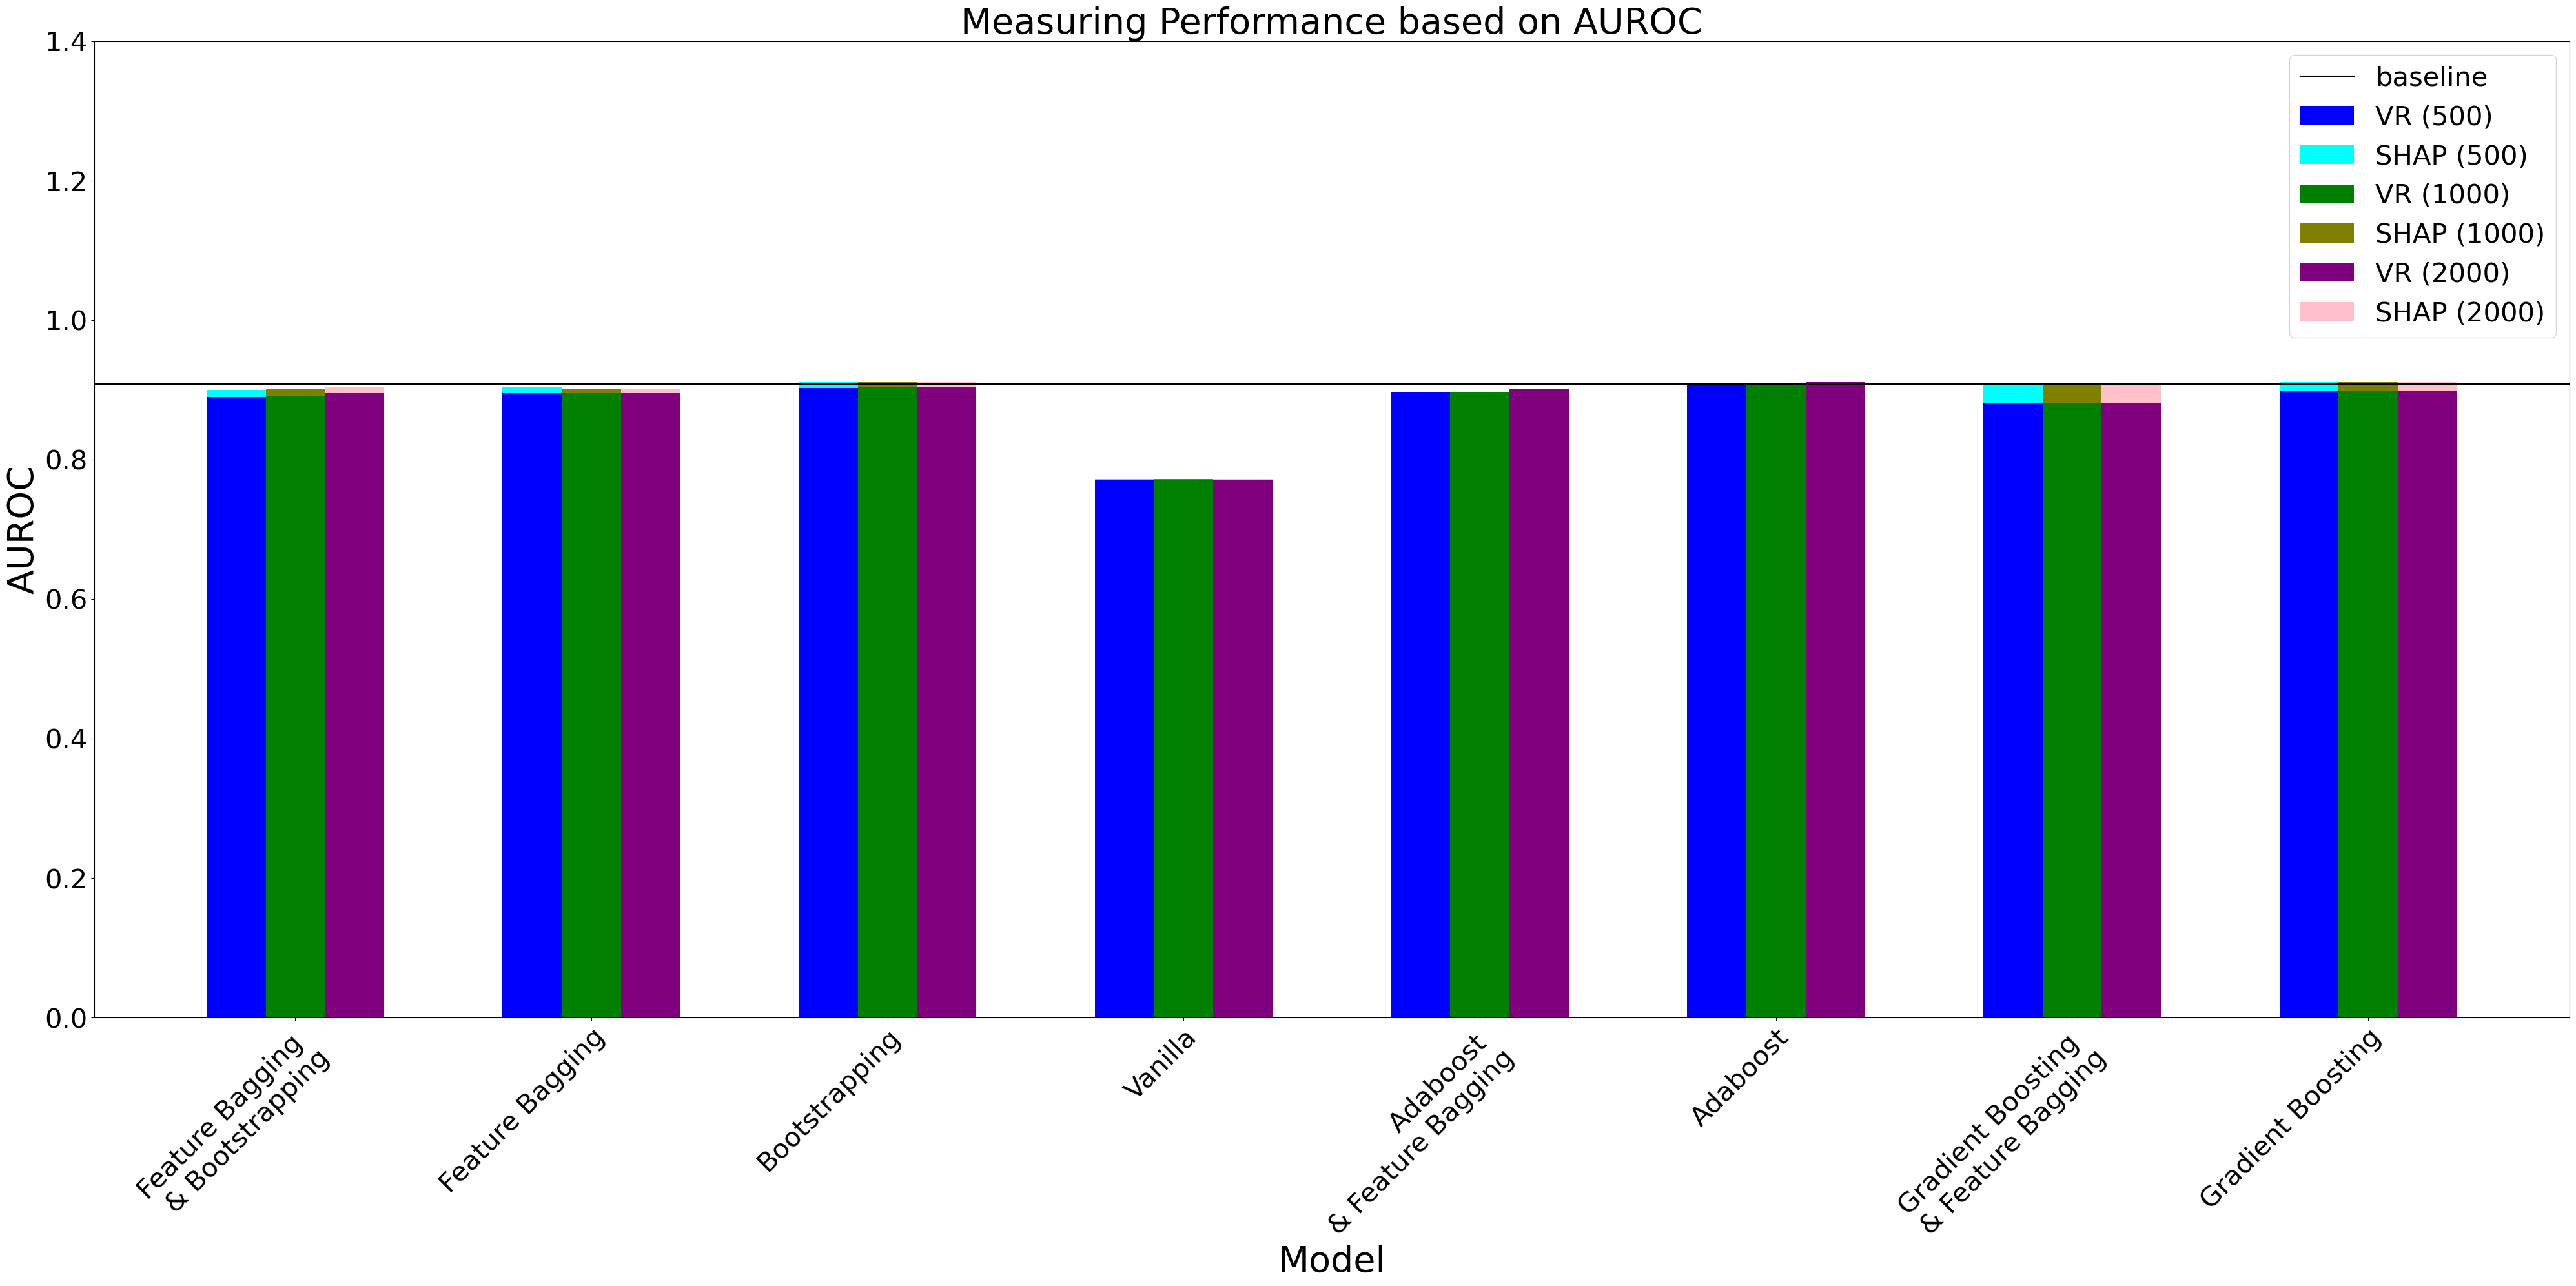

In [96]:
mr=100

plt. figure(figsize=(40, 20))

results=results_all[results_all["MR"] == mr]

index = results.loc[(results["N_EST"]==500) & (results["FI"]=='VR'), "Index"]
vr = results.loc[(results["N_EST"]==500) & (results["FI"]=='VR'), "AUROC"]
shap = results.loc[(results["N_EST"]==500) & (results["FI"]=='SHAP'), "AUROC"]

bar_width = 0.2
bar_positions_1 = range(len(index))
plt.bar(x=bar_positions_1,height=vr,color="blue",align='edge', width=bar_width)
plt.bar(x=bar_positions_1,height=[i - j for i, j in zip(shap, vr)],color="cyan",align='edge', bottom = vr, width=bar_width)

vr = results.loc[(results["N_EST"]==1000) & (results["FI"]=='VR'), "AUROC"]
shap = results.loc[(results["N_EST"]==1000) & (results["FI"]=='SHAP'), "AUROC"]

bar_positions_2 = [pos + bar_width for pos in bar_positions_1]
plt.bar(x=bar_positions_2,height=vr,color="green",align='edge', width=bar_width)
plt.bar(x=bar_positions_2,height=[i - j for i, j in zip(shap, vr)],color="olive",align='edge', bottom = vr, width=bar_width)

vr = results.loc[(results["N_EST"]==2000) & (results["FI"]=='VR'), "AUROC"]
shap = results.loc[(results["N_EST"]==2000) & (results["FI"]=='SHAP'), "AUROC"]

bar_positions_3 = [pos + bar_width for pos in bar_positions_2]
plt.bar(x=bar_positions_3,height=vr,color="purple",align='edge', width=bar_width)
plt.bar(x=bar_positions_3,height=[i - j for i, j in zip(shap, vr)],color="pink",align='edge', bottom = vr, width=bar_width)

tickvalues = np.array(bar_positions_2) + bar_width/2

plt.ylim(0,1.4)

plt.axhline(y = 0.9078733931801096, color = 'black', linestyle = '-') 

plt.xticks(ticks = tickvalues,labels = index, rotation=45, ha='right', size = 30, wrap=True)
plt.yticks(size = 30)

plt.title("Measuring Performance based on AUROC",  size = 40)
plt.xlabel("Model",  size = 40)
plt.ylabel("AUROC",  size = 40)

plt.legend(["baseline", "VR (500)", "SHAP (500)", "VR (1000)", "SHAP (1000)", "VR (2000)", "SHAP (2000)"], fontsize=30, loc='upper right')

plt.tight_layout()
plt.savefig("results/AUROC_{}MR.png".format(mr))